In [7]:
import numpy as np
import yroots as yr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# function to filter out roots outside of the interval (allows for nicer plots)
def rootfilter(roots,a,b,tol):
    roots = roots[np.all(roots >= a - tol,axis = 1)]
    roots = roots[np.all(roots <= b + tol,axis = 1)]
    return roots

def residuals(func, roots):
    return np.abs(func(roots[:,0],roots[:,1]))

def print_residuals(funcs, chebfun_roots, yroots):
    print("YRoots Residuals")
    print("Residuals for f: " + str(residuals(funcs[0], yroots)))
    print("Residuals for g: " + str(residuals(funcs[1], yroots)))

    print("Chebfun2 Residuals")
    print("Residuals for f: " + str(residuals(funcs[0], chebfun_roots)))
    print("Residuals for g: " + str(residuals(funcs[1], chebfun_roots)))

# `test_roots01`

Percent Finished: 100%       
Total intervals checked was 541
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.5545 97.9667  1.4787  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

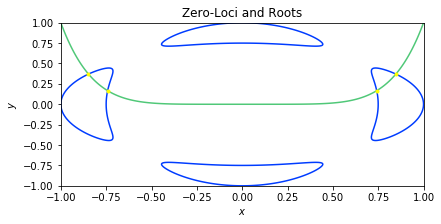

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[1.93825817e-13 1.04262371e-13 1.39463291e-13 1.47649488e-13]
YRoots Residuals
Residuals for f: [1.38697942e-11 3.12638804e-13 6.79278855e-12 7.21911420e-12]
Residuals for g: [2.24709140e-13 8.24895707e-14 5.25579580e-13 4.07174294e-14]
Chebfun2 Residuals
Residuals for f: [2.84217094e-14 4.26325641e-14 4.26325641e-14 2.84217094e-14]
Residuals for g: [6.66133815e-16 7.77156117e-16 7.77156117e-16 6.66133815e-16]


In [14]:
###test_roots01
#01
f = lambda x,y: 144*(x**4+y**4)-225*(x**2+y**2) + 350*x**2*y**2+81
g = lambda x,y: y-x**6

r1 = np.loadtxt('chebfun_test_output/cftest1_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

[-1 -1]
[1 1]
Percent Finished: 100%         
Total intervals checked was 1888
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 7.0975 84.9047  6.8326  1.1653  0.    ]


<Figure size 3600x2400 with 0 Axes>

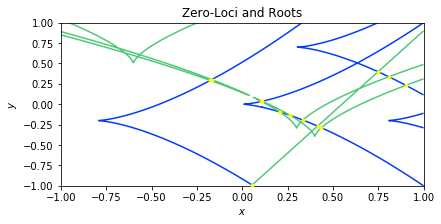

Number of roots: 13
Number found by yroots: 13
Distance between chebfun solutions and yroots solutions:
[1.56588415e-10 2.26056574e-07 9.50196748e-07 7.55441136e-09
 7.93507230e-08 1.41552235e-08 2.25962604e-09 3.93562194e-08
 9.82353500e-07 2.27998085e-07 4.97852204e-10 2.10061542e-11
 4.19857556e-11]
YRoots Residuals
Residuals for f: [3.18577057e-12 1.18917319e-12 5.07853518e-13 7.88465415e-12
 1.71107930e-12 2.65495733e-12 5.49394582e-12 1.84350718e-12
 3.31459271e-12 4.24265222e-12 6.55945625e-12 1.03461017e-11
 7.03518616e-12]
Residuals for g: [4.30447947e-12 9.45678386e-15 1.72998864e-11 2.47044440e-11
 1.54531317e-12 1.90270393e-15 3.10609737e-16 2.75691091e-15
 2.79273979e-14 5.89223107e-13 3.26033075e-12 9.67461203e-12
 5.96334522e-13]
Chebfun2 Residuals
Residuals for f: [1.21914461e-17 5.80751001e-17 6.49386818e-16 2.16565708e-15
 2.20780938e-15 2.12029635e-13 1.98754286e-12 7.83195384e-17
 1.02004686e-12 4.83149495e-14 3.37228856e-16 2.70529695e-16
 6.33905412e-16]
Residuals

In [15]:
#02

f = lambda x,y: (y**2-x**3)*((y-0.7)**2-(x-0.3)**3)*((y+0.2)**2-(x+0.8)**3)*((y+0.2)**2-(x-0.8)**3)
g = lambda x,y: ((y+.4)**3-(x-.4)**2)*((y+.3)**3-(x-.3)**2)*((y-.5)**3-(x+.6)**2)*((y+0.3)**3-(2*x-0.8)**3)

r1 = np.loadtxt('chebfun_test_output/cftest1_2.csv',delimiter=',')
# a = np.array([min(r1[:,0]),min(r1[:,1])])
# b = np.array([max(r1[:,0]),max(r1[:,1])])
a = np.array([-1,-1])
b = np.array([1,1])
print(a)
print(b)
r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
    
print_residuals([f,g], r1, r2)

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

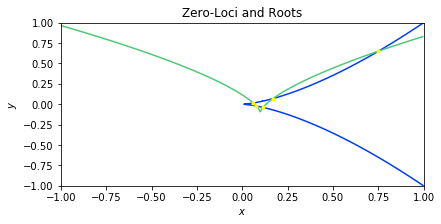

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[1.09936373e-13 2.16795239e-13 2.54162250e-13 2.08683909e-14
 1.20088981e-15]
YRoots Residuals
Residuals for f: [2.55351296e-15 2.39391840e-16 3.25667228e-16 1.07395646e-15
 1.88651178e-15]
Residuals for g: [2.44249065e-15 1.47538232e-15 3.11122655e-15 6.37093460e-15
 8.63130639e-15]
Chebfun2 Residuals
Residuals for f: [1.22785896e-16 8.52725009e-17 3.77302356e-17 1.71737624e-16
 0.00000000e+00]
Residuals for g: [8.93382590e-17 9.02056208e-17 1.76128643e-16 1.25767452e-16
 0.00000000e+00]


In [16]:
#03
f = lambda x,y: y**2-x**3
g = lambda x,y: (y+.1)**3-(x-.1)**2

r1 = np.loadtxt('chebfun_test_output/cftest1_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

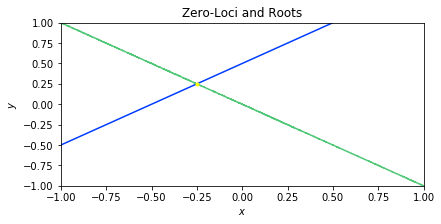

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and yroots solutions:
[6.20633538e-17]
YRoots Residuals
Residuals for f: 0.0
Residuals for g: 8.326672684688674e-17
Chebfun2 Residuals
Residuals for f: 0.0
Residuals for g: 0.0


In [17]:
#04
f = lambda x,y: x - y + .5
g = lambda x,y: x + y

r1 = np.loadtxt('chebfun_test_output/cftest1_4.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and yroots solutions:')
print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print("YRoots Residuals")
print("Residuals for f: " + str(np.abs(f(r2[0][0], r2[0][1]))))
print("Residuals for g: " + str(np.abs(g(r2[0][0], r2[0][1]))))

print("Chebfun2 Residuals")
print("Residuals for f: " + str(np.abs(f(r1[0], r1[1]))))
print("Residuals for g: " + str(np.abs(g(r1[0], r1[1]))))

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

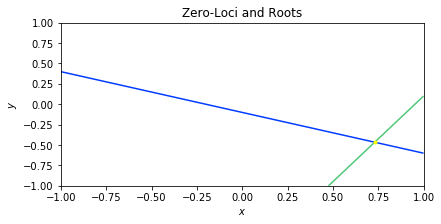

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and yroots solutions:
5.4672143489065705e-16
YRoots Residuals
Residuals for f: 1.3877787807814457e-16
Residuals for g: 0.0
Chebfun2 Residuals
Residuals for f: 4.718447854656915e-16
Residuals for g: 0.0


In [18]:
#05
f = lambda x,y: y + x/2 + 1/10
g = lambda x,y: y - 2.1*x + 2

r1 = np.loadtxt('chebfun_test_output/cftest1_5.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and yroots solutions:')
print(np.linalg.norm(r1-r2[0]))

print("YRoots Residuals")
print("Residuals for f: " + str(np.abs(f(r2[0][0], r2[0][1]))))
print("Residuals for g: " + str(np.abs(g(r2[0][0], r2[0][1]))))

print("Chebfun2 Residuals")
print("Residuals for f: " + str(np.abs(f(r1[0], r1[1]))))
print("Residuals for g: " + str(np.abs(g(r1[0], r1[1]))))

# `test_roots02`

Percent Finished: 100%         
Total intervals checked was 757
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [26.288  71.9947  1.7173  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

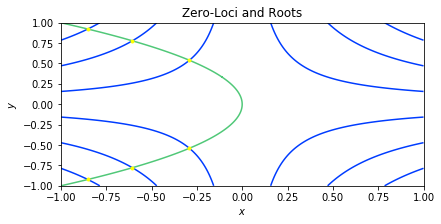

Number of roots: 6
Number found by yroots: 6
Distance between chebfun solutions and yroots solutions:
[6.38045182e-13 1.56749592e-12 2.36909279e-12 2.12730497e-12
 1.60755159e-12 4.16764918e-13]
YRoots Residuals
Residuals for f: [5.96595568e-12 9.99448806e-12 9.56171076e-14 3.42475475e-12
 2.17161461e-11 8.76235019e-14]
Residuals for g: [1.19204646e-12 2.92310620e-12 6.78790357e-13 3.06921155e-12
 8.28004332e-13 1.29507516e-12]
Chebfun2 Residuals
Residuals for f: [5.8201672e-16 5.8201672e-16 7.0448140e-16 7.0448140e-16 6.1232340e-17
 6.1232340e-17]
Residuals for g: [7.77156117e-16 7.77156117e-16 1.11022302e-16 1.11022302e-16
 1.66533454e-16 1.66533454e-16]


In [19]:
#01
f = lambda x,y: np.cos(10*x*y)
g = lambda x,y: x + y**2

r1 = np.loadtxt('chebfun_test_output/cftest2_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
    
print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 3559
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.     95.2515  4.7485  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

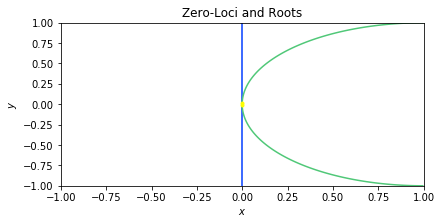

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[3.07114599e-10 3.37553726e-10]
YRoots Residuals
Residuals for f: [4.23516474e-22 0.00000000e+00]
Residuals for g: [9.54680779e-12 8.68594086e-12]
Chebfun2 Residuals
Residuals for f: [0. 0.]
Residuals for g: [3.33066907e-16 3.33066907e-16]


In [20]:
#02
f = lambda x,y: x
g = lambda x,y: (x-.9999)**2 + y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest2_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 1096
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [16.0584 81.6606  2.281   0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

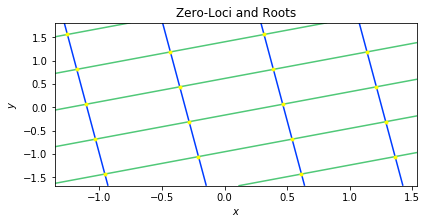

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[1.28931696e-13 5.56089036e-14 2.56186343e-12 1.39748736e-13
 5.94973895e-14]
YRoots Residuals
Residuals for f: [1.02630241e-11 1.36212923e-13 2.05490839e-13 5.65325564e-13
 1.08135723e-13]
Residuals for g: [4.92666446e-12 1.15279498e-13 2.09449295e-13 2.73497721e-13
 1.61809285e-13]
Chebfun2 Residuals
Residuals for f: [1.55431223e-15 1.33226763e-15 1.22464680e-16 1.01064310e-15
 1.65389216e-15]
Residuals for g: [3.82856870e-16 2.60330292e-15 1.83758918e-15 5.05321550e-16
 1.59265982e-15]


In [17]:
#03
f = lambda x,y: np.sin(4*(x + y/10 + np.pi/10))
g = lambda x,y: np.cos(2*(x-2*y+ np.pi/7))

r1 = np.loadtxt('chebfun_test_output/cftest2_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
    
print_residuals([f,g], r1, r2)

# `test_roots03`

Percent Finished: 100%       
Total intervals checked was 523
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.     96.9407  2.4857  0.5736  0.    ]


<Figure size 3600x2400 with 0 Axes>

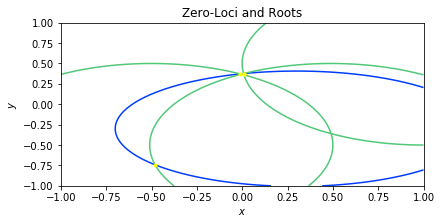

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[2.44016715e-12 6.04327963e-10 3.76597771e-09 4.22758296e-08]
YRoots Residuals
Residuals for f: [5.16475751e-13 2.35500508e-12 1.01807451e-12 0.00000000e+00]
Residuals for g: [8.66952718e-13 7.45170249e-14 3.47407230e-13 7.12356753e-12]
Chebfun2 Residuals
Residuals for f: [4.44089210e-16 4.44089210e-16 1.11022302e-16 8.88178420e-16]
Residuals for g: [5.71256418e-16 6.30208728e-17 5.73352258e-17 2.21695281e-17]


In [21]:
#01
f = lambda x,y: ((x-.3)**2+2*(y+0.3)**2-1)
g = lambda x,y: ((x-.49)**2+(y+.5)**2-1)*((x+0.5)**2+(y+0.5)**2-1)*((x-1)**2+(y-0.5)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))

print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 7984
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.8141 96.6934  1.9915  0.501   0.    ]


<Figure size 3600x2400 with 0 Axes>

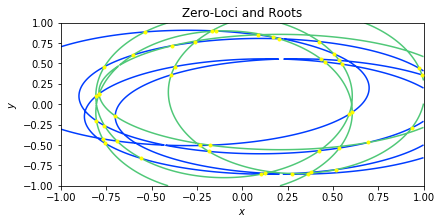

Number of roots: 45
Number found by yroots: 45
Distance between chebfun solutions and yroots solutions:
[2.14294295e-09 1.91726823e-10 1.58510829e-08 3.98171001e-08
 7.77042741e-11 1.86827502e-10 1.06936595e-10 2.83598356e-11
 8.52992977e-11 2.97717033e-10 1.58924325e-10 1.37248553e-11
 5.30411985e-11 1.10555468e-10 2.42168864e-10 1.23639550e-10
 8.37795219e-10 2.00725024e-10 3.25154111e-10 1.75504880e-11
 3.43151507e-10 7.32859395e-10 4.07526010e-09 2.62606740e-08
 6.53583488e-08 5.96828142e-10 8.48543268e-11 1.50983174e-09
 5.20253068e-11 3.78001660e-10 4.93468252e-10 5.36693055e-11
 2.41629215e-10 1.53010559e-10 1.02733294e-10 3.88726949e-10
 1.86596560e-10 7.72116479e-10 1.17082157e-10 2.43643381e-10
 5.27663767e-10 2.53585585e-10 1.24777060e-11 3.73907323e-11
 1.45345922e-11]
YRoots Residuals
Residuals for f: [1.74136343e-12 7.22403537e-12 9.90164080e-13 4.50481415e-12
 2.85751753e-12 2.39376656e-14 2.99200207e-12 2.31720626e-13
 5.47749027e-12 3.63973044e-12 1.13255918e-12 2.2279

In [22]:
#02
f = lambda x,y: ((x-0.1)**2+2*(y-0.1)**2-1)*((x+0.3)**2+2*(y-0.2)**2-1)*((x-0.3)**2+2*(y+0.15)**2-1)*((x-0.13)**2+2*(y+0.15)**2-1)
g = lambda x,y: (2*(x+0.1)**2+(y+0.1)**2-1)*(2*(x+0.1)**2+(y-0.1)**2-1)*(2*(x-0.3)**2+(y-0.15)**2-1)*((x-0.21)**2+2*(y-0.15)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

print_residuals([f,g], r1, r2)

# `test_roots04`

Percent Finished: 100%       
Total intervals checked was 493
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [10.5477 87.2211  2.2312  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

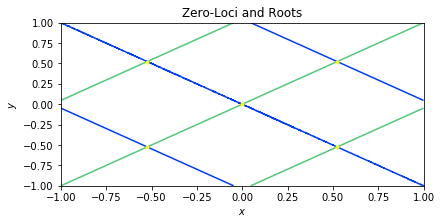

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and yroots solutions:
[3.19513815e-13 2.76650291e-13 8.94375942e-13 3.75409107e-13
 1.99872770e-13]
YRoots Residuals
Residuals for f: [8.47000588e-13 1.47415413e-12 1.47415413e-12 3.79452016e-12
 1.17493758e-12]
Residuals for g: [0.00000000e+00 1.17362016e-13 1.17362016e-13 0.00000000e+00
 0.00000000e+00]
Chebfun2 Residuals
Residuals for f: [7.65713740e-16 0.00000000e+00 4.39677899e-18 0.00000000e+00
 7.65713740e-16]
Residuals for g: [0.00000000e+00 7.65713740e-16 1.83560134e-17 7.65713740e-16
 0.00000000e+00]


In [23]:
#01
f = lambda x,y: np.sin(3*(x+y))
g = lambda x,y: np.sin(3*(x-y))

r1 = np.loadtxt('chebfun_test_output/cftest4_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

In [38]:
#02

#FREEZES

# This one can't seem to get an accurate approximation no matter how much it subdivides. 
# We find that np.sum(np.abs(coeff2)) > 1.e-8
# no matter what level (tried up to 35) or what the target degree is (I've tried 9, 2, 100, et al.)

f = lambda x,y: ((90000*y**10 + (-1440000)*y**9 + (360000*x**4 + 720000*x**3 + 504400*x**2 + 144400*x + 9971200)*(y**8) + 
                ((-4680000)*x**4 + (-9360000)*x**3 + (-6412800)*x**2 + (-1732800)*x + (-39554400))*(y**7) + (540000*x**8 + 
                2160000*x**7 + 3817600*x**6 + 3892800*x**5 + 27577600*x**4 + 51187200*x**3 + 34257600*x**2 + 8952800*x + 100084400)*(y**6) + 
                ((-5400000)*x**8 + (-21600000)*x**7 + (-37598400)*x**6 + (-37195200)*x**5 + (-95198400)*x**4 + 
                (-153604800)*x**3 + (-100484000)*x**2 + (-26280800)*x + (-169378400))*(y**5) + (360000*x**12 + 2160000*x**11 + 
                6266400*x**10 + 11532000*x**9 + 34831200*x**8 + 93892800*x**7 + 148644800*x**6 + 141984000*x**5 + 206976800*x**4 + 
                275671200*x**3 + 176534800*x**2 + 48374000*x + 194042000)*(y**4) + ((-2520000)*x**12 + (-15120000)*x**11 + (-42998400)*x**10 + 
                (-76392000)*x**9 + (-128887200)*x**8 + (-223516800)*x**7 + (-300675200)*x**6 + (-274243200)*x**5 + (-284547200)*x**4 + 
                (-303168000)*x**3 + (-190283200)*x**2 + (-57471200)*x + (-147677600))*(y**3) + (90000*x**16 + 720000*x**15 + 3097600*x**14 + 
                9083200*x**13 + 23934400*x**12 + 58284800*x**11 + 117148800*x**10 + 182149600*x**9 + 241101600*x**8 + 295968000*x**7 + 
                320782400*x**6 + 276224000*x**5 + 236601600*x**4 + 200510400*x**3 + 123359200*x**2 + 43175600*x + 70248800)*(y**2) + 
                ((-360000)*x**16 + (-2880000)*x**15 + (-11812800)*x**14 + (-32289600)*x**13 + (-66043200)*x**12 + (-107534400)*x**11 + 
                (-148807200)*x**10 + (-184672800)*x**9 + (-205771200)*x**8 + (-196425600)*x**7 + (-166587200)*x**6 + (-135043200)*x**5 + 
                (-107568800)*x**4 + (-73394400)*x**3 + (-44061600)*x**2 + (-18772000)*x + (-17896000))*y + (144400*x**18 + 1299600*x**17 + 
                5269600*x**16 + 12699200*x**15 + 21632000*x**14 + 32289600*x**13 + 48149600*x**12 + 63997600*x**11 + 67834400*x**10 + 
                61884000*x**9 + 55708800*x**8 + 45478400*x**7 + 32775200*x**6 + 26766400*x**5 + 21309200*x**4 + 11185200*x**3 + 6242400*x**2 + 
                3465600*x + 1708800)))
g = lambda x,y: 1e-4*(y**7 + (-3)*y**6 + (2*x**2 + (-1)*x + 2)*y**5 + (x**3 + (-6)*x**2 + x + 2)*y**4 + (x**4 + (-2)*x**3 + 2*x**2 + 
                x + (-3))*y**3 + (2*x**5 + (-3)*x**4 + x**3 + 10*x**2 + (-1)*x + 1)*y**2 + ((-1)*x**5 + 3*x**4 + 4*x**3 + (-12)*x**2)*y + 
                (x**7 + (-3)*x**5 + (-1)*x**4 + (-4)*x**3 + 4*x**2))

r1 = np.loadtxt('chebfun_test_output/cftest4_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
print(a)
print(b)
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

[0.1929909  0.40060319]
[0.30971288 0.5431364 ]
Percent Finished: 0.0%       

KeyboardInterrupt: 

# `test_roots05`

Percent Finished: 100%         
Total intervals checked was 1588
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [25.3149 73.1738  1.3854  0.1259  0.    ]


<Figure size 3600x2400 with 0 Axes>

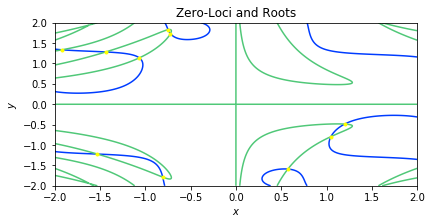

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[3.54960139e-12 2.78226980e-12 1.95836013e-12 3.06099741e-12
 7.66024178e-12 4.48167806e-12 1.36303028e-12 8.68818859e-13
 1.33277278e-12 8.44328224e-12]
YRoots Residuals
Residuals for f: [1.79567472e-12 1.17106325e-12 3.98359123e-12 1.16804899e-11
 4.69274619e-12 9.78828130e-13 1.76281212e-12 8.95028496e-12
 3.09113846e-13 1.80545023e-11]
Residuals for g: [7.23743288e-12 4.14168699e-12 3.94240196e-13 1.34943168e-11
 5.17663690e-12 8.87123708e-12 1.32005518e-12 8.95172825e-13
 1.06238351e-11 4.20574686e-12]
Chebfun2 Residuals
Residuals for f: [4.84057239e-14 3.50275364e-14 1.13797860e-14 4.32986980e-15
 1.24900090e-15 1.08246745e-15 1.26565425e-14 8.43769499e-15
 5.32907052e-15 1.13242749e-14]
Residuals for g: [7.32747196e-14 6.98330282e-14 9.62563362e-14 1.38111744e-13
 1.35447209e-14 1.99840144e-14 2.52020627e-14 1.01030295e-14
 8.88178420e-16 2.22044605e-15]


In [29]:
#01
f = lambda x,y: 2*x*y*np.cos(y**2)*np.cos(2*x)-np.cos(x*y)
g = lambda x,y: 2*np.sin(x*y**2)*np.sin(3*x*y)-np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest5_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-2,-2],[2,2],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots06`

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

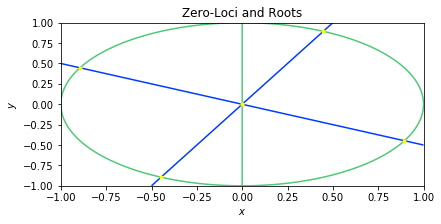

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 9.62851680e-16 -9.64405890e-09]
 [ 9.65924724e-16  9.64405906e-09]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
YRoots Residuals
Residuals for f: [1.24126708e-15 1.48952049e-15 1.24126708e-16 9.30078861e-17
 9.30078612e-17 3.72380123e-16]
Residuals for g: [5.46157514e-16 9.93013661e-17 2.97904098e-16 9.65924724e-16
 9.62851680e-16 1.98602732e-16]
Chebfun2 Residuals
Residuals for f: [0.0000000e+00 0.0000000e+00 1.1326999e-16 0.0000000e+00 0.0000000e+00]
Residuals for g: [1.98602732e-16 9.93013661e-17 9.89338159e-18 9.93013661e-17
 1.98602732e-16]


In [32]:
#01
f = lambda x,y: (y - 2*x)*(y+0.5*x)
g = lambda x,y: x*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

print_residuals([f,g], r1, r2)

Here we find that YRoots and Chebfun find the exact same roots except for the roots at (0,0). YRoots, for some reason, finds two roots close to (0,0), where we would expect only one root.

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

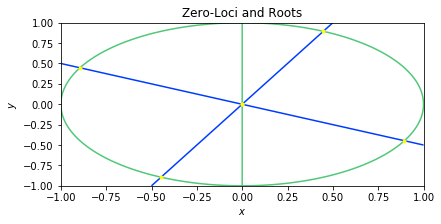

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 1.00000000e-04 -5.00000006e-05]
 [ 1.00000000e-04  2.00000001e-04]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
YRoots Residuals
Residuals for f: [4.96506831e-16 1.48952049e-15 1.11714037e-15 1.58477617e-16
 1.58501562e-16 9.93013661e-16]
Residuals for g: [5.95941424e-16 4.96395808e-16 3.97249873e-15 5.72865316e-17
 4.74338427e-17 7.94322111e-16]
Chebfun2 Residuals
Residuals for f: [0.0000000e+00 0.0000000e+00 1.1326999e-16 0.0000000e+00 0.0000000e+00]
Residuals for g: [1.98624937e-16 9.93235706e-17 1.00000000e-04 9.92791617e-17
 1.98580528e-16]


In [33]:
#02

# We actually find two where there should be two!

f = lambda x,y: (y - 2*x)*(y+.5*x)
g = lambda x,y: (x-.0001)*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

print_residuals([f,g], r1, r2)

We see that YRoots finds two roots near the origin, where there should be two. The line $(x - .0001)$ and the lines $(y - 2*x)$ and $(y+.5*x)$ should have intersections at $(.0001, .0002)$ and $(.0001, .00005)$, respectively. YRoots finds these roots.

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

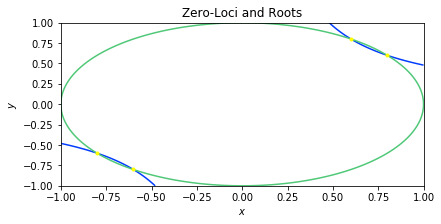

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[6.47365705e-16 1.94209711e-15 4.96506831e-16 1.37327004e-15]
YRoots Residuals
Residuals for f: [1.95399252e-14 8.88178420e-15 1.77635684e-14 1.42108547e-14]
Residuals for g: [1.55431223e-15 9.99200722e-16 1.33226763e-15 4.44089210e-16]
Chebfun2 Residuals
Residuals for f: [5.32907052e-15 5.32907052e-15 5.32907052e-15 5.32907052e-15]
Residuals for g: [4.4408921e-16 4.4408921e-16 4.4408921e-16 4.4408921e-16]


In [34]:
#03


f = lambda x,y: 25*x*y - 12
g = lambda x,y: x**2+y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest6_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots07`

Percent Finished: 100%       
Total intervals checked was 439
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.4556 93.1663  0.      6.3781  0.    ]


<Figure size 3600x2400 with 0 Axes>

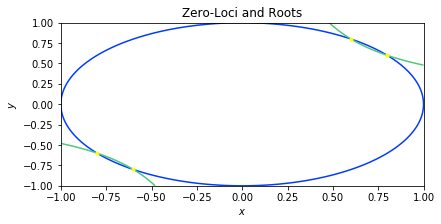

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[2.64181734e-09 3.33458110e-09 2.91066514e-08 2.42647076e-08]
YRoots Residuals
Residuals for f: [4.99228555e-10 3.88131933e-09 9.81856154e-11 7.14520886e-10]
Residuals for g: [7.01225628e-08 1.04464898e-08 4.38738193e-08 1.71106498e-08]
Chebfun2 Residuals
Residuals for f: [8.43769499e-16 2.26485497e-15 2.22044605e-16 1.33226763e-16]
Residuals for g: [1.01252340e-14 3.62376795e-14 2.66453526e-15 1.59872116e-15]


In [35]:
#01

f = lambda x,y: (x**2+y**2-1)*(x-1.1)
g = lambda x,y: (25*x*y-12)*(x-1.1)

r1 = np.loadtxt('chebfun_test_output/cftest7_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True, approx_tol=1.e-6) # NOTE THE CHANGED APPROX_TOL
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

[-0.88004961 -0.44790238]
[0.88004961 0.03588643]
Percent Finished: 100%         
Total intervals checked was 1072
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [13.9925 83.9552  2.0522  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

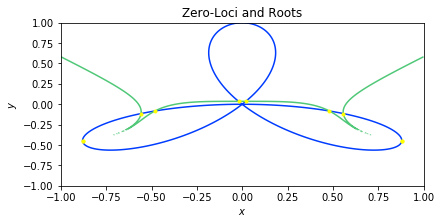

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[1.43640143e-08 5.46823191e-08 1.48118435e-07 1.38912054e-07
 5.76592336e-12 2.41598593e-11 3.55895716e-11 2.46783535e-11
 1.31130813e-09 3.30470757e-09]
YRoots Residuals
Residuals for f: [1.27586830e-12 1.08968390e-12 2.20160001e-12 6.37265934e-12
 1.18427544e-13 3.56378571e-14 3.18515353e-12 2.32365516e-12
 1.84952054e-12 1.52688973e-12]
Residuals for g: [8.76898554e-11 4.61497507e-11 6.38755715e-11 8.74809114e-11
 1.77191373e-10 1.77282411e-10 9.96287497e-11 7.04294401e-11
 9.18256582e-11 2.18429719e-11]
Chebfun2 Residuals
Residuals for f: [2.22044605e-16 1.11022302e-16 1.66533454e-16 8.32667268e-17
 1.12852344e-16 1.07957287e-16 1.87350135e-16 4.16333634e-16
 3.33066907e-16 1.11022302e-16]
Residuals for g: [1.33764111e-11 1.33542066e-11 3.41371376e-12 3.24607008e-12
 3.33066907e-12 3.37196937e-12 3.87290200e-12 3.30446781e-12
 1.30642164e-11 1.30420119e-11]


In [36]:
#02

f = lambda x,y: y**4 + (-1)*y**3 + (2*x**2)*(y**2) + (3*x**2)*y + (x**4)
h = lambda x,y: y**10-2*(x**8)*(y**2)+4*(x**4)*y-2
g = lambda x,y: h(2*x,2*(y+.5))

r1 = np.loadtxt('chebfun_test_output/cftest7_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
print(a)
print(b)

r2 = yr.solve([f,g],[-1,-1],[1,1],plot=True, approx_tol=1.e-9)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

[-5.00000000e-10 -7.85398163e-10]
[5.00000000e-10 7.85398163e-10]
Percent Finished: 100%       
Total intervals checked was 286
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 8.042  90.2098  1.7483  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

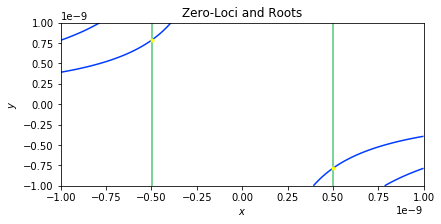

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[2.90689154e-20 3.81715474e-20]
YRoots Residuals
Residuals for f: [9.62119273e-12 2.16457963e-11]
Residuals for g: [1.13066223e-11 6.01529937e-12]
Chebfun2 Residuals
Residuals for f: [3.33066907e-16 5.55111512e-16]
Residuals for g: [0.00000000e+00 1.11022302e-16]


In [37]:
#03

c = 1.e-09
f = lambda x,y: np.cos(x*y/(c**2))+np.sin(3*x*y/(c**2))
g = lambda x,y: np.cos(y/c)-np.cos(2*x*y/(c**2))

r1 = np.loadtxt('chebfun_test_output/cftest7_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
print(a)
print(b)
r2 = yr.solve([f,g],[-1e-9,-1e-9],[1e-9,1e-9],plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots08`

Percent Finished: 100%         
Total intervals checked was 5482
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [16.8916 81.1565  1.9518  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

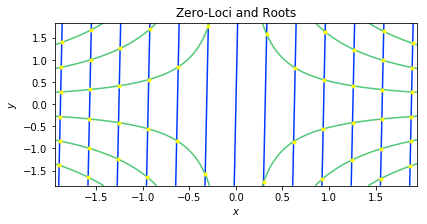

Number of roots: 8
Number found by yroots: 8
Distance between chebfun solutions and yroots solutions:
[2.35951048e-13 1.83028135e-12 7.13778304e-13 4.89667292e-12
 8.44080403e-12 9.61743438e-12 1.79013642e-12 1.81824267e-12]
YRoots Residuals
Residuals for f: [4.96167648e-15 2.02128620e-15 3.92010772e-15 6.43249060e-16
 4.68582146e-15 3.67394040e-16 1.53142748e-15 3.92010772e-15]
Residuals for g: [2.41445254e-11 3.46294643e-12 1.99468792e-12 4.22168026e-13
 3.33171806e-12 2.68700005e-11 3.53644319e-12 1.40077451e-11]
Chebfun2 Residuals
Residuals for f: [3.92010772e-15 3.67394040e-16 2.44929360e-16 2.90946462e-15
 2.90946462e-15 2.44929360e-16 3.67394040e-16 3.92010772e-15]
Residuals for g: [5.05321550e-16 5.05321550e-16 6.04901475e-16 3.82856870e-16
 3.82856870e-16 6.04901475e-16 5.05321550e-16 5.05321550e-16]


In [26]:
#01
f = lambda x,y: np.sin(10*x-y/10)
g = lambda x,y: np.cos(3*x*y)

r1 = np.loadtxt('chebfun_test_output/cftest8_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

Percent Finished: 100%         
Total intervals checked was 3115
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [30.8828 67.5762  1.1236  0.4173  0.    ]


<Figure size 3600x2400 with 0 Axes>

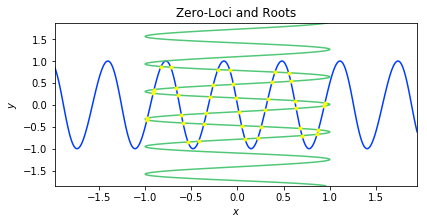

Number of roots: 39
Number found by yroots: 39
Distance between chebfun solutions and yroots solutions:
[4.97814496e-13 7.30434164e-13 2.43204864e-13 8.23968755e-13
 3.69018185e-12 6.20415447e-12 1.34830103e-12 1.67032119e-12
 5.32620456e-13 3.85636875e-12 1.27461688e-12 3.32408338e-12
 8.23073498e-12 7.02152427e-12 2.76618840e-12 1.95764958e-12
 1.27607870e-13 6.91818478e-12 3.04943681e-12 6.46778382e-12
 3.40989105e-12 1.62847270e-12 1.60542575e-12 2.55962022e-12
 2.21683167e-12 1.04673841e-12 4.20601839e-12 3.36169167e-12
 3.97447074e-12 1.09075136e-12 6.40469142e-13 1.30936495e-12
 1.29013293e-12 6.53223754e-13 3.35348973e-12 4.96578597e-12
 2.55660955e-12 7.05119870e-13 3.18734957e-12]
YRoots Residuals
Residuals for f: [4.33708625e-12 4.58189042e-13 4.39724646e-12 2.92782465e-11
 7.00572933e-12 1.20004284e-11 1.19072807e-12 1.11712722e-13
 1.31713668e-11 1.94619876e-11 3.66732200e-11 5.72875081e-12
 7.35100869e-12 1.94504135e-12 1.19527166e-11 1.33134059e-11
 1.73386860e-11 8.2773

In [27]:
#02
f = lambda x,y: np.sin(10*x-y/10) + y
g = lambda x,y: np.cos(10*y-x/10) - x

r1 = np.loadtxt('chebfun_test_output/cftest8_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots09`

Percent Finished: 100%       
Total intervals checked was 178
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [17.9775 79.7753  0.      2.2472  0.    ]


<Figure size 3600x2400 with 0 Axes>

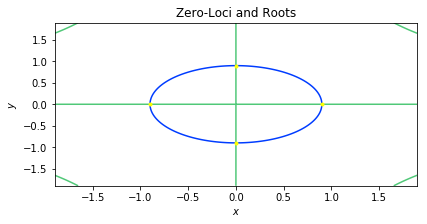

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[0.00000000e+00 2.18491583e-11 2.20715863e-11 0.00000000e+00]
YRoots Residuals
Residuals for f: [0. 0. 0. 0.]
Residuals for g: [1.39047122e-11 1.39047115e-11 1.40462577e-11 1.40462817e-11]
Chebfun2 Residuals
Residuals for f: [0. 0. 0. 0.]
Residuals for g: [6.70883460e-18 7.91633262e-18 3.11188399e-18 6.75112000e-18]


In [28]:
#01
f = lambda x,y: x**2+y**2-.9**2
g = lambda x,y: np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest9_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

Percent Finished: 100%       
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

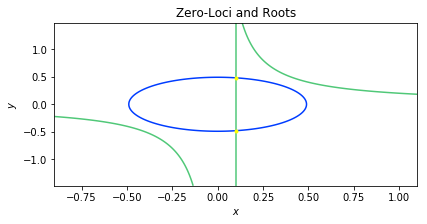

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[6.75322301e-16 3.46222298e-15]
YRoots Residuals
Residuals for f: [3.10862447e-15 2.77555756e-16]
Residuals for g: [4.21971514e-17 4.12950907e-17]
Chebfun2 Residuals
Residuals for f: [3.05311332e-16 0.00000000e+00]
Residuals for g: [1.23885272e-16 1.51909745e-16]


In [29]:
#02
f = lambda x,y: x**2+y**2-.49**2
g = lambda x,y: (x-.1)*(x*y-.2)

r1 = np.loadtxt('chebfun_test_output/cftest9_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)

# `test_roots10`

Percent Finished: 100%         
Total intervals checked was 2176
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [30.4688 68.0147  1.5165  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

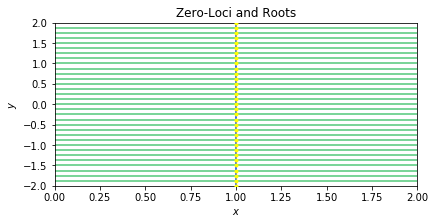

Number of roots: 17
Number found by yroots: 17
Distance between chebfun solutions and yroots solutions:
[5.51056601e-14 1.55225895e-13 7.83053608e-14 1.10467191e-13
 1.94209711e-14 2.25900923e-13 7.10032544e-14 2.81785234e-13
 3.54555505e-14 1.01780120e-13 9.46363095e-14 9.66937333e-14
 2.70786582e-13 5.67991662e-14 1.13561218e-13 1.75942889e-13
 1.98955714e-13]
YRoots Residuals
Residuals for f: [4.39967129e-13 9.36466802e-14 1.04267160e-13 5.81869097e-13
 1.06136189e-13 4.34881958e-14 4.52676187e-14 1.43212943e-14
 0.00000000e+00 2.79764818e-14 2.79594116e-14 2.19100834e-14
 1.56567359e-13 3.24703737e-14 1.28280203e-13 1.70980713e-13
 1.15632386e-13]
Residuals for g: [8.37134792e-14 2.05254854e-12 6.49057651e-12 2.40004337e-12
 1.93102661e-11 6.58924746e-12 6.54029855e-12 7.20307299e-12
 2.41907228e-12 2.11748374e-11 5.25202532e-12 1.66204912e-11
 1.29694021e-12 7.80276536e-12 5.36480714e-12 1.02530333e-11
 1.01733246e-12]
Chebfun2 Residuals
Residuals for f: [0. 0. 0. 0. 0. 0. 0. 0. 0

In [30]:
#01
f = lambda x,y: (x-1)*(np.cos(x*y**2)+2)
g = lambda x,y: np.sin(8*np.pi*y)*(np.cos(x*y)+2)

r1 = np.loadtxt('chebfun_test_output/cftest10_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))
    
print_residuals([f,g], r1, r2)